In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from pylab import rcParams

In [ ]:
with open('classes.txt', 'r') as f:
    lines = f.readlines()

animalNames = []
for line in lines:
    animalNames.append(line.replace('\n', '').split('\t')[-1])

with open('predicate-matrix-continuous.txt', 'r') as f:
    lines = f.readlines()

predMatrix = []
for line in lines:
    predMatrix.append([float(val.strip()) for val in line.split(' ') if val.strip() != ''])

predMatrix = np.array(predMatrix)
print(predMatrix)

[[-1.   -1.   -1.   ...  2.35  9.7   8.38]
 [39.25  1.39  0.   ... 58.64 20.14 11.39]
 [83.4  64.79  0.   ... 15.77 13.41 15.42]
 ...
 [63.57 43.1   0.   ... 35.95 28.26  5.  ]
 [55.31 55.46  0.   ...  5.04 18.89 72.99]
 [10.22 21.53 27.73 ...  3.96 14.05 37.98]]


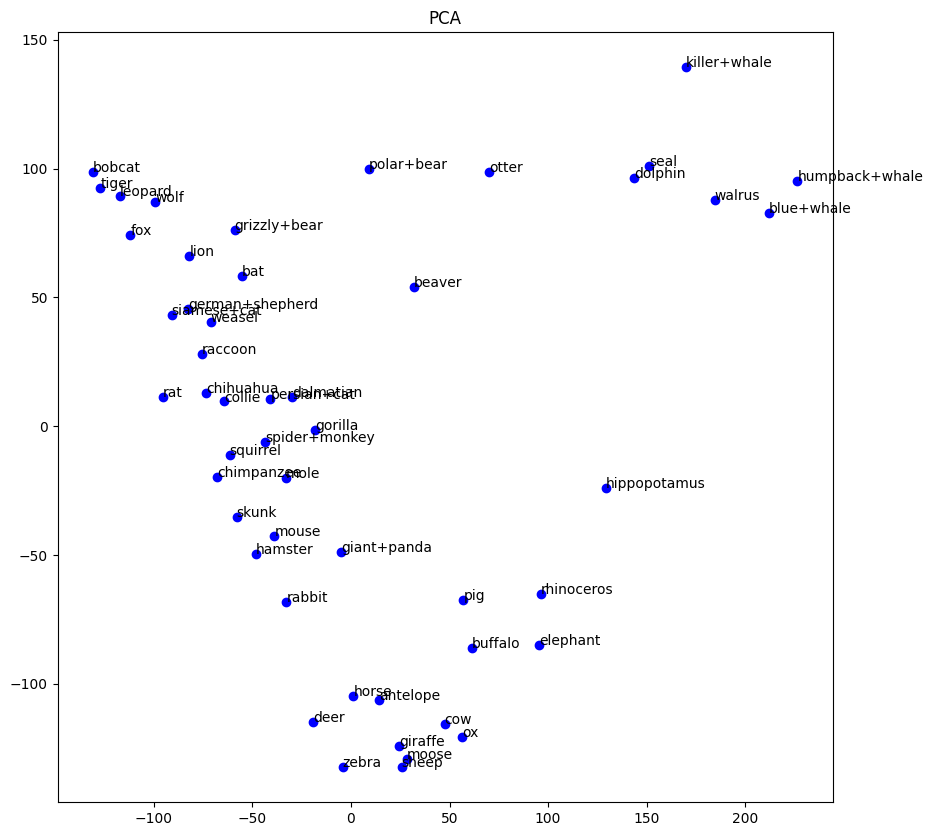

In [ ]:
embeddings = {}
pca = PCA(n_components=2)
pca.fit(predMatrix)
embeddings['pca'] = pca.transform(predMatrix)

rcParams['figure.figsize'] = 10, 10

for i in range(len(embeddings['pca'])):
    plt.plot(embeddings['pca'][i,0], embeddings['pca'][i,1], 'bo')
    plt.text(embeddings['pca'][i,0], embeddings['pca'][i,1], animalNames[i])

plt.title("PCA")
plt.show()

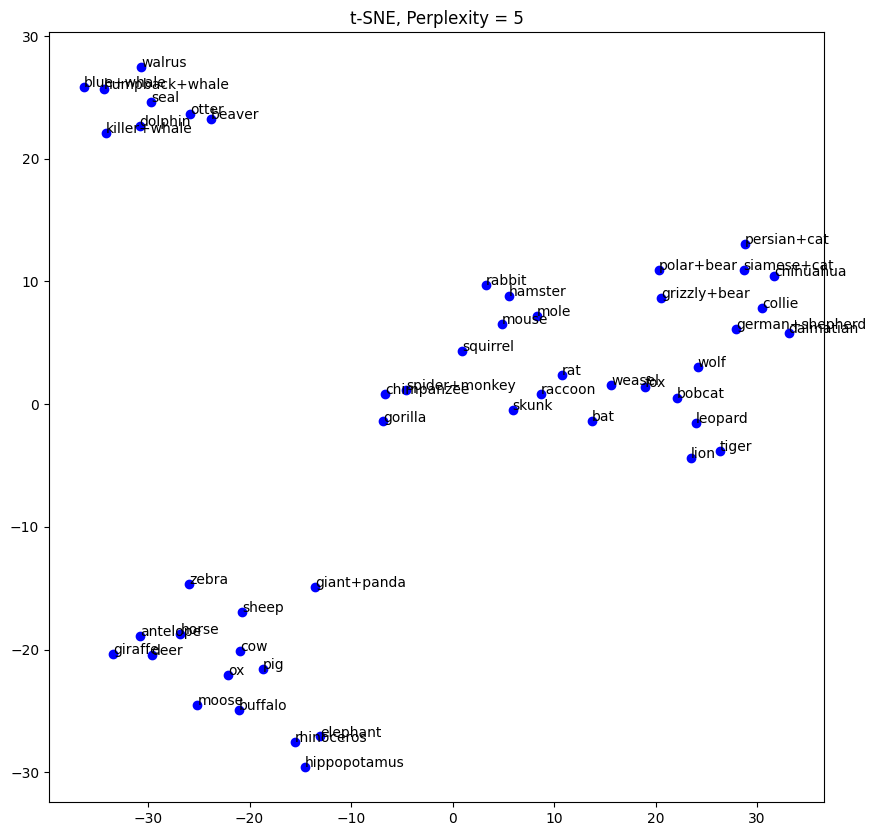

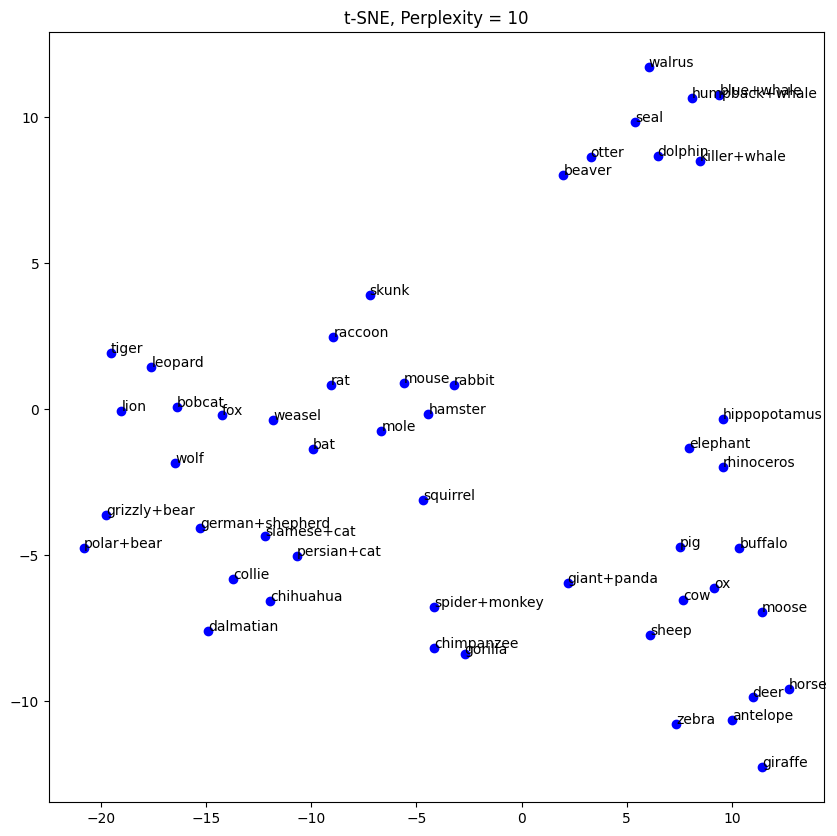

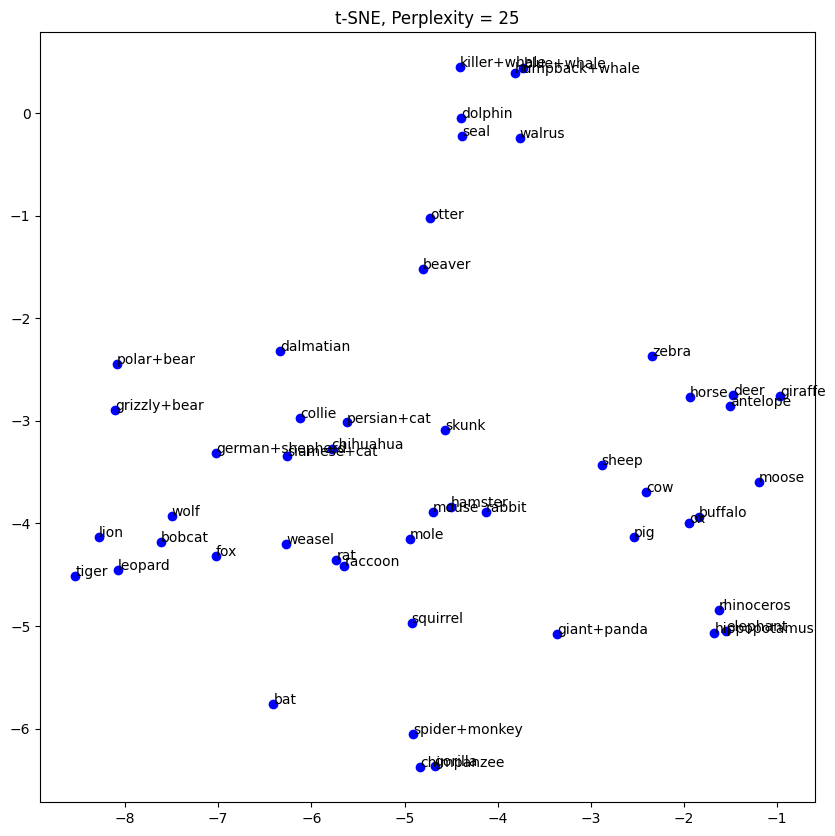

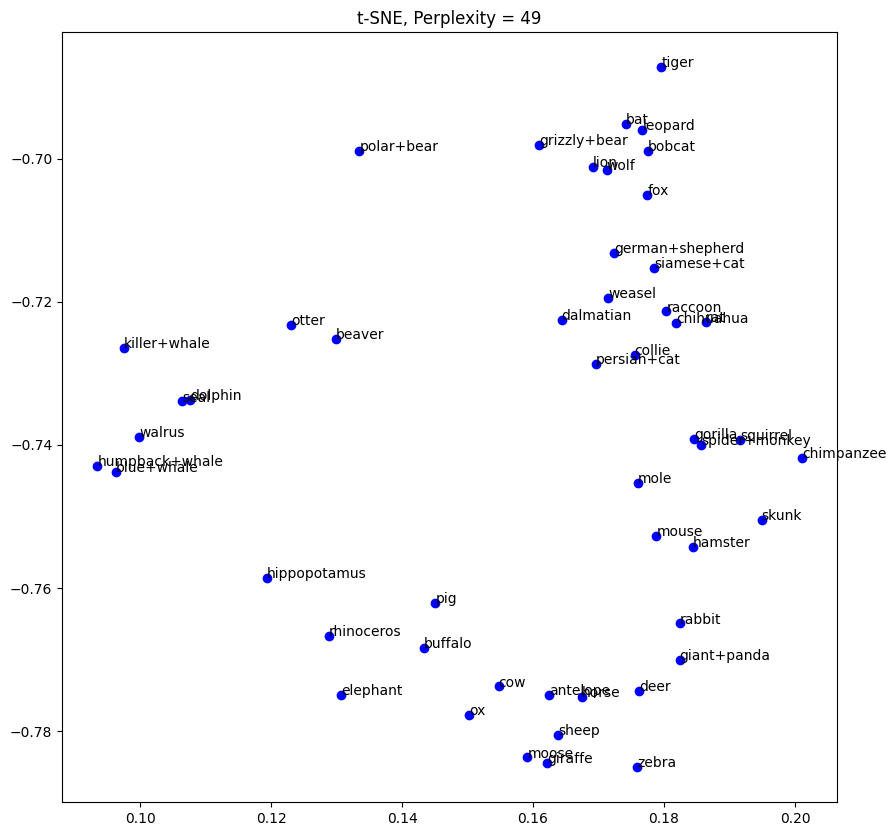

In [ ]:
rcParams['figure.figsize'] = 10, 10

for pp in [5, 10, 25, 49]:
    emb = TSNE(n_components=2, perplexity=pp).fit_transform(predMatrix)
    for i in range(len(emb)):
        plt.plot(emb[i,0], emb[i,1], 'bo')
        plt.text(emb[i,0], emb[i,1], animalNames[i])

    embeddings['tsne'+str(pp)] = emb
    plt.title("t-SNE, Perplexity = "+ str(pp))
    plt.show()
    plt.close()

In [ ]:
n = len(animalNames)
D = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        D[i,j] = np.linalg.norm(predMatrix[i] - predMatrix[j])

for k in embeddings:
    emb = embeddings[k]
    Dhat = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            Dhat[i,j] = np.linalg.norm(emb[i] - emb[j])

    c = np.mean(D)/np.mean(Dhat)

    delta = np.ones((n,n))

    for i in range(n):
        for j in range(n):
            if(D[i,j] != 0 and Dhat[i,j] != 0):
                delta[i,j] = max(D[i,j]/(Dhat[i,j]*c), (c*Dhat[i,j]/D[i,j]))

    distortion = np.mean(delta)
    print("Average distortion of ", k, " is ", distortion)

Average distortion of  pca  is  1.8147225492939223
Average distortion of  tsne5  is  1.944085875152828
Average distortion of  tsne10  is  1.675272947692262
Average distortion of  tsne25  is  1.6014528162827875
Average distortion of  tsne49  is  1.6930955795160836
